<a href="https://colab.research.google.com/github/KamilaFidelix/daebac/blob/main/Projeto_Final_Pipeline_Telegram_Kamila_Fidelix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Projeto** | Pipeline de Dados do Telegram I
Aluna **Kamila Fidelix**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Contexto;</li>
  O presente projeto foi desenvolvido como conclusão do curso Profissão Analista de Dados da Escola Britânica de Artes Criativas & Tecnologia (EBAC) e tem como objetivo a construção de um pipeline de dados em nuvem.
  Tem como objetivo a construção de um pipeline de dados que processe, armazene e exponha as mensagens e suas informações referentes de um grupo do Telegram, para que profissionais da área de Dados possam realizar as análises pertinentes.
  Uma atividade de grande interesse para empresas que já utilizam ou pensam em utilizar os chatbots, é a análise exploratória dos dados enviados ao bot, para responder perguntas como:

- Qual horário os usuários mais acionam o bot?
- Qual dúvida ou problema mais recorrente?
- O bot está conseguindo esclarecer as dúvidas?


  <li>Telegram;</li>

  O Telegram é um aplicativo de mensagens instantâneas freeware, ou seja, distribuído gratuitamente, e em sua maioria, open source. É popular entre desenvolvedores por ser pioneiro na implantação da funcionalidade de criação de chatbots, que por sua vez, permitem a criação de diversas automações. Está disponível para smartphones e tablets (Android, IOS, Windows phone, Firefox, Ubuntu) e também aplicação Web.

  <li>Dados.</li>

  Os dados presentes neste projeto podem ser divididos em dois tipos: transacionais e analíticos. Os dados transacionais são representados pelas mensagens enviadas por usuários em um grupo no Telegram, e os dados analíticos são os dados provenientes dos sistemas transacionais manipulados na etapa de ETL (extraction, transformation and load)

<li>Ingestão;</li>
A etapa de ingestão é responsável por inserir os dados transacionais no ambiente analítico. Como o Telegram retem as mensagens por apenas 24 horas, a ingestão via streaming é a mais indicada para este projeto.

<li>ETL;</li>
A etapa de extração, transformação e carregamento é a etapa responsável pela manipulação dos dados extraídos na etapa transacional, ou seja, persistidos em camadas cruas (raw) dos sistemas analíticos.

<li>Apresentação;</li>
Nesta etapa, o AWS Athena tem como função apresentar os dados aos usuários e sistemas, através de uma interface SQL. Portanto, é necessário a criação de uma tabela externa sobre o dado armazenado na camada mais refinada da arquitetura, a camada enriquecida (enriched) - entregando assim dados mais consistentes e com consultas mais baratas.
</ol>

---

## 1\. Telegram.

O Telegram representa a fonte de dados transacionais deste projeto. Foi criado um grupo de usuários com a presença de um bot, responsável por capturar as mensagens e redirecioná-las via webhook do backend do aplicativo para um endpoint, exposto pela API Gateway (AWS Services). As mensagens trafegam no corpo ou payload da requisição.

### \\**1.6**. Envie diversos tipos de mensagens no grupo (text, imagem, arquivos, video, áudio, etc.) e as consuma utilizand a API de *bots* do **Telegram**.

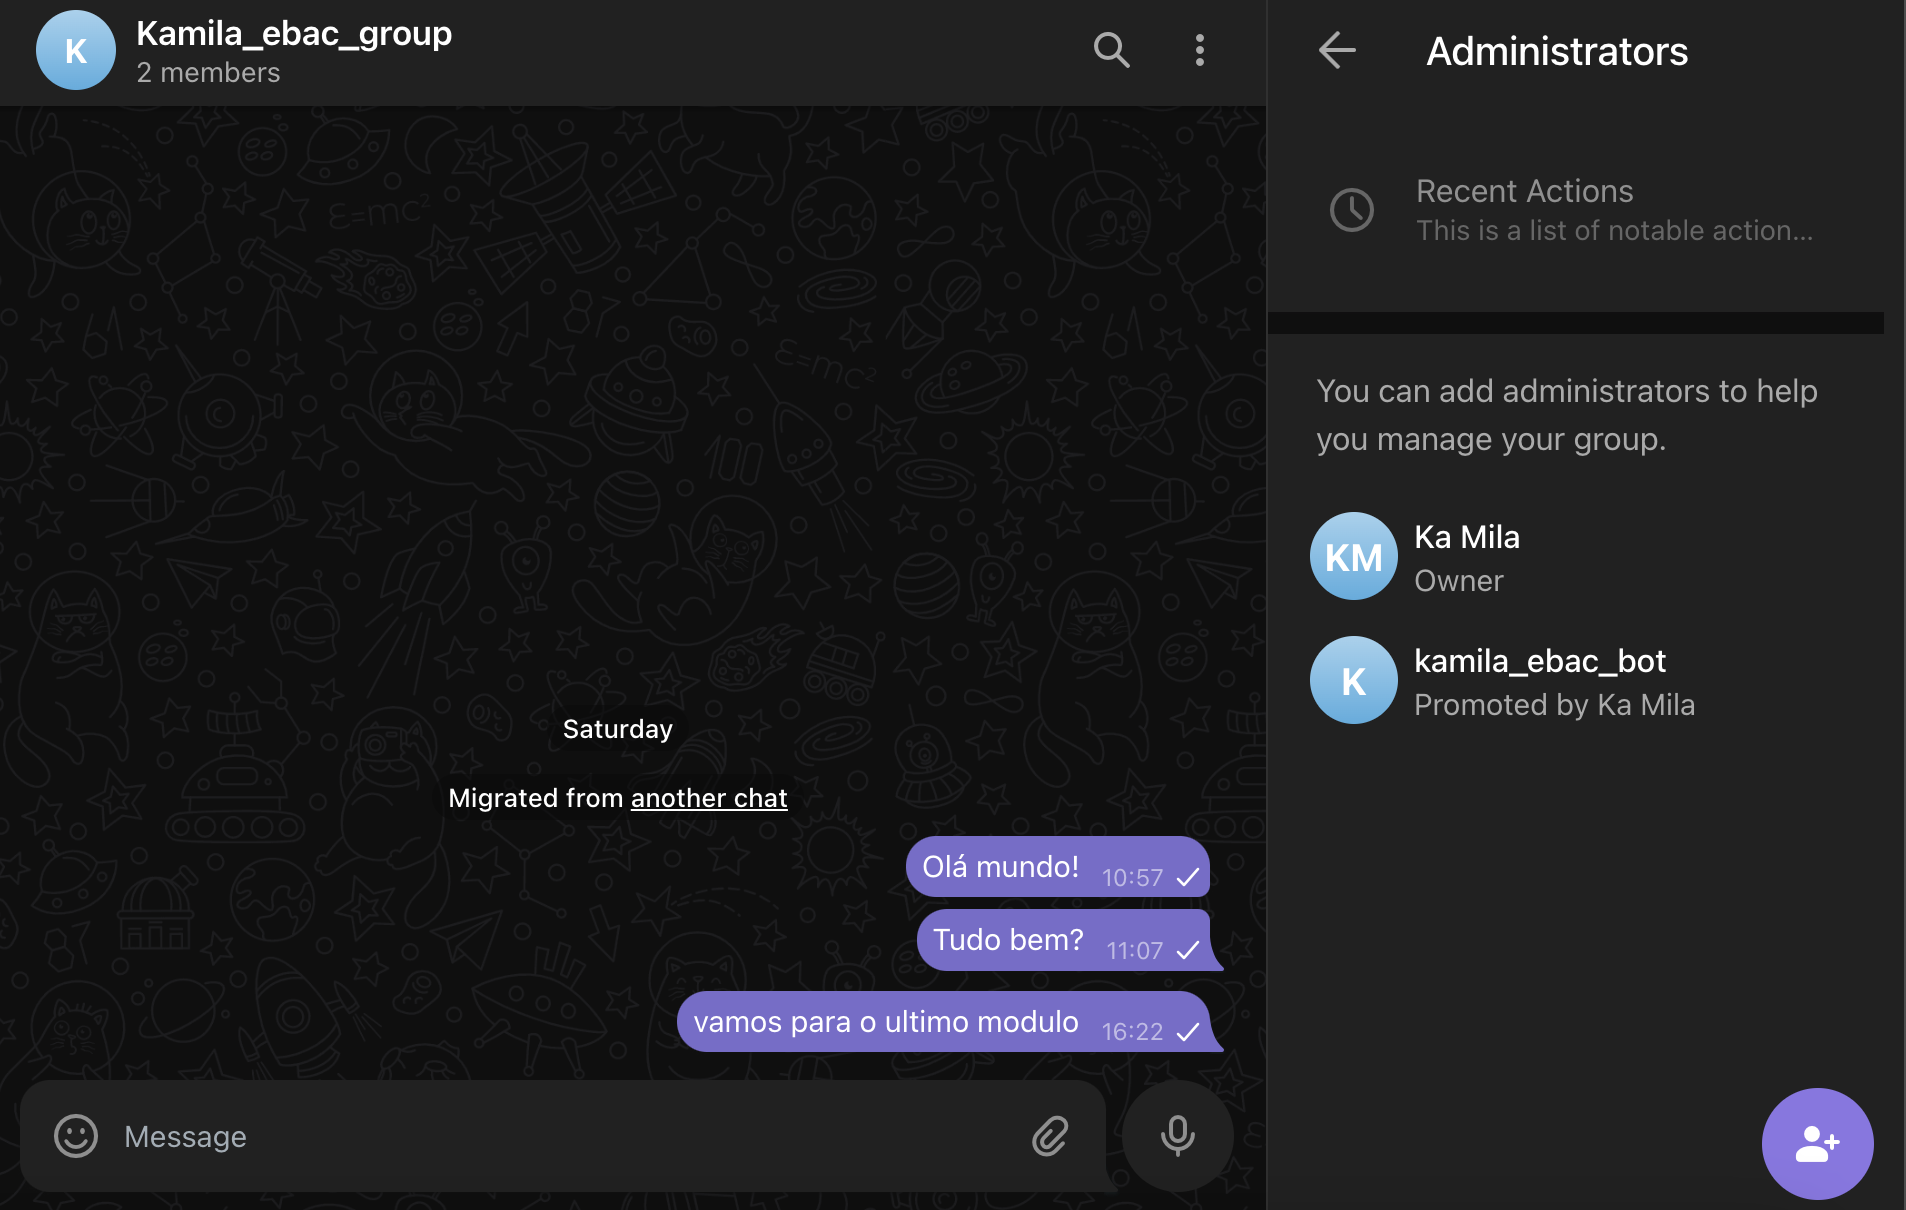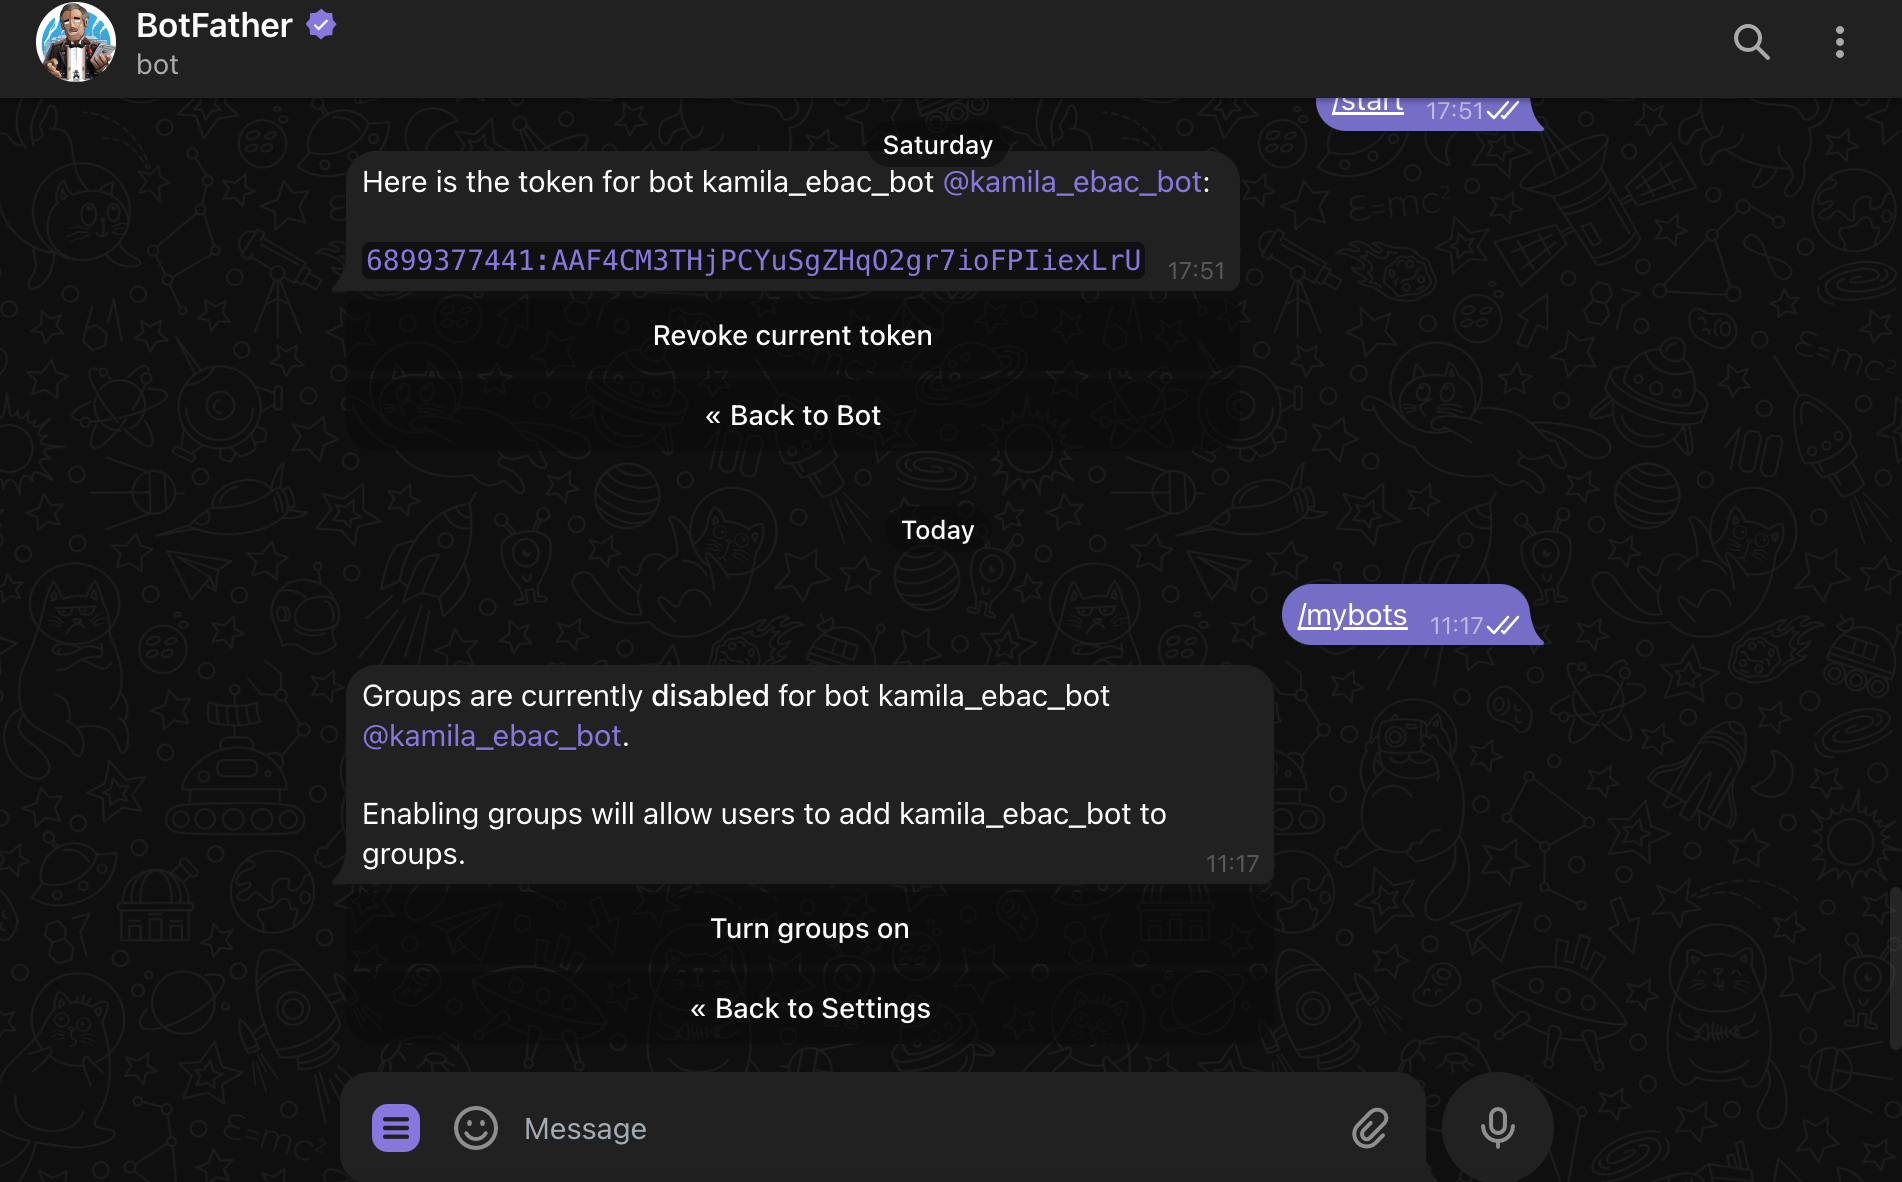

1- Bot API

In [ ]:
from getpass import getpass

token = getpass()

··········


In [ ]:
import json



import requests

base_url = f'https://api.telegram.org/bot{token}'

In [ ]:
response = requests.get(url=f'{base_url}/getMe')
print(f'{base_url}/getMe')

print(json.dumps(json.loads(response.text), indent=2))

https://api.telegram.org/bot6899377441:AAF4CM3THjPCYuSgZHqO2gr7ioFPIiexLrU/getMe
{
  "ok": true,
  "result": {
    "id": 6899377441,
    "is_bot": true,
    "first_name": "kamila_ebac_bot",
    "username": "kamila_ebac_bot",
    "can_join_groups": false,
    "can_read_all_group_messages": false,
    "supports_inline_queries": false
  }
}


In [ ]:
response = requests.get(url=f'{base_url}/getUpdates')

print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": [
    {
      "update_id": 837546630,
      "my_chat_member": {
        "chat": {
          "id": -1002104910904,
          "title": "Kamila_ebac_group",
          "type": "supergroup"
        },
        "from": {
          "id": 5208002203,
          "is_bot": false,
          "first_name": "Ka",
          "last_name": "Mila",
          "language_code": "en"
        },
        "date": 1708362881,
        "old_chat_member": {
          "user": {
            "id": 6899377441,
            "is_bot": true,
            "first_name": "kamila_ebac_bot",
            "username": "kamila_ebac_bot"
          },
          "status": "member"
        },
        "new_chat_member": {
          "user": {
            "id": 6899377441,
            "is_bot": true,
            "first_name": "kamila_ebac_bot",
            "username": "kamila_ebac_bot"
          },
          "status": "administrator",
          "can_be_edited": false,
          "can_manage_chat": true,
          "

# 2- Dados

In [ ]:
%%writefile telegram.json
{
      "update_id": 837546631,
      "message": {
        "message_id": 8,
        "from": {
          "id": 5208002203,
          "is_bot": false,
          "first_name": "Ka",
          "last_name": "Mila",
          "language_code": "en"
        },
        "chat": {
          "id": -1002104910904,
          "title": "Kamila_ebac_group",
          "type": "supergroup"
        },
        "date": 1708365275,
        "text": "ol\u00e1"
      }
    }

Overwriting telegram.json


In [ ]:
import json

with open('telegram.json', mode='r', encoding='utf8') as fp:
  data = json.load(fp)
  data = data["message"]

In [ ]:
print(json.dumps(data, indent=2))

{
  "message_id": 8,
  "from": {
    "id": 5208002203,
    "is_bot": false,
    "first_name": "Ka",
    "last_name": "Mila",
    "language_code": "en"
  },
  "chat": {
    "id": -1002104910904,
    "title": "Kamila_ebac_group",
    "type": "supergroup"
  },
  "date": 1708365275,
  "text": "ol\u00e1"
}


In [ ]:
from datetime import datetime

date = datetime.now().strftime('%Y-%m-%d')
timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

parsed_data = dict()

for key, value in data.items():

    if key == 'from':
        for k, v in data[key].items():
            if k in ['id', 'is_bot', 'first_name']:
              parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

    elif key == 'chat':
        for k, v in data[key].items():
            if k in ['id', 'type']:
              parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

    elif key in ['message_id', 'date', 'text']:
        parsed_data[key] = [value]

if not 'text' in parsed_data.keys():
  parsed_data['text'] = [None]

parsed_data['context_date'] = [date]
parsed_data['context_timestamp'] = [timestamp]

In [ ]:
for k, v in parsed_data.items():
  print(f"{k}: {v}")

# 3- Tabela

In [ ]:
import pyarrow as pa

table = pa.Table.from_pydict(mapping=parsed_data)

In [ ]:
table

pyarrow.Table
message_id: int64
user_id: int64
user_is_bot: bool
user_first_name: string
chat_id: int64
chat_type: string
date: int64
text: string
context_date: string
context_timestamp: string
----
message_id: [[8]]
user_id: [[5208002203]]
user_is_bot: [[false]]
user_first_name: [["Ka"]]
chat_id: [[-1002104910904]]
chat_type: [["supergroup"]]
date: [[1708365275]]
text: [["olá"]]
context_date: [["2024-02-19"]]
context_timestamp: [["2024-02-19 18:13:18"]]

# 4- Ingestão

Uma requisição HTTP com o conteúdo da mensagem em seu payload é recebida pelo AWS API Gateway que, por sua vez, as redireciona para o AWS Lambda, servindo assim como gatilho. Já o AWS Lambda recebe o payload da requisição em seu parâmetro event, que salva o conteúdo em um arquivo de formato JSON (original) e o armazena em um bucket específico no AWS S3 particionado por dia.

As mensagens capturadas pelo bot podem ser acessadas via API. A única requisição necessária é o token fornecido pelo botFather na criação do bot. Por isso, começamos com a autenticação abaixo:

1.1. `bucket` no `AWS S3` para o armazenamento de dados






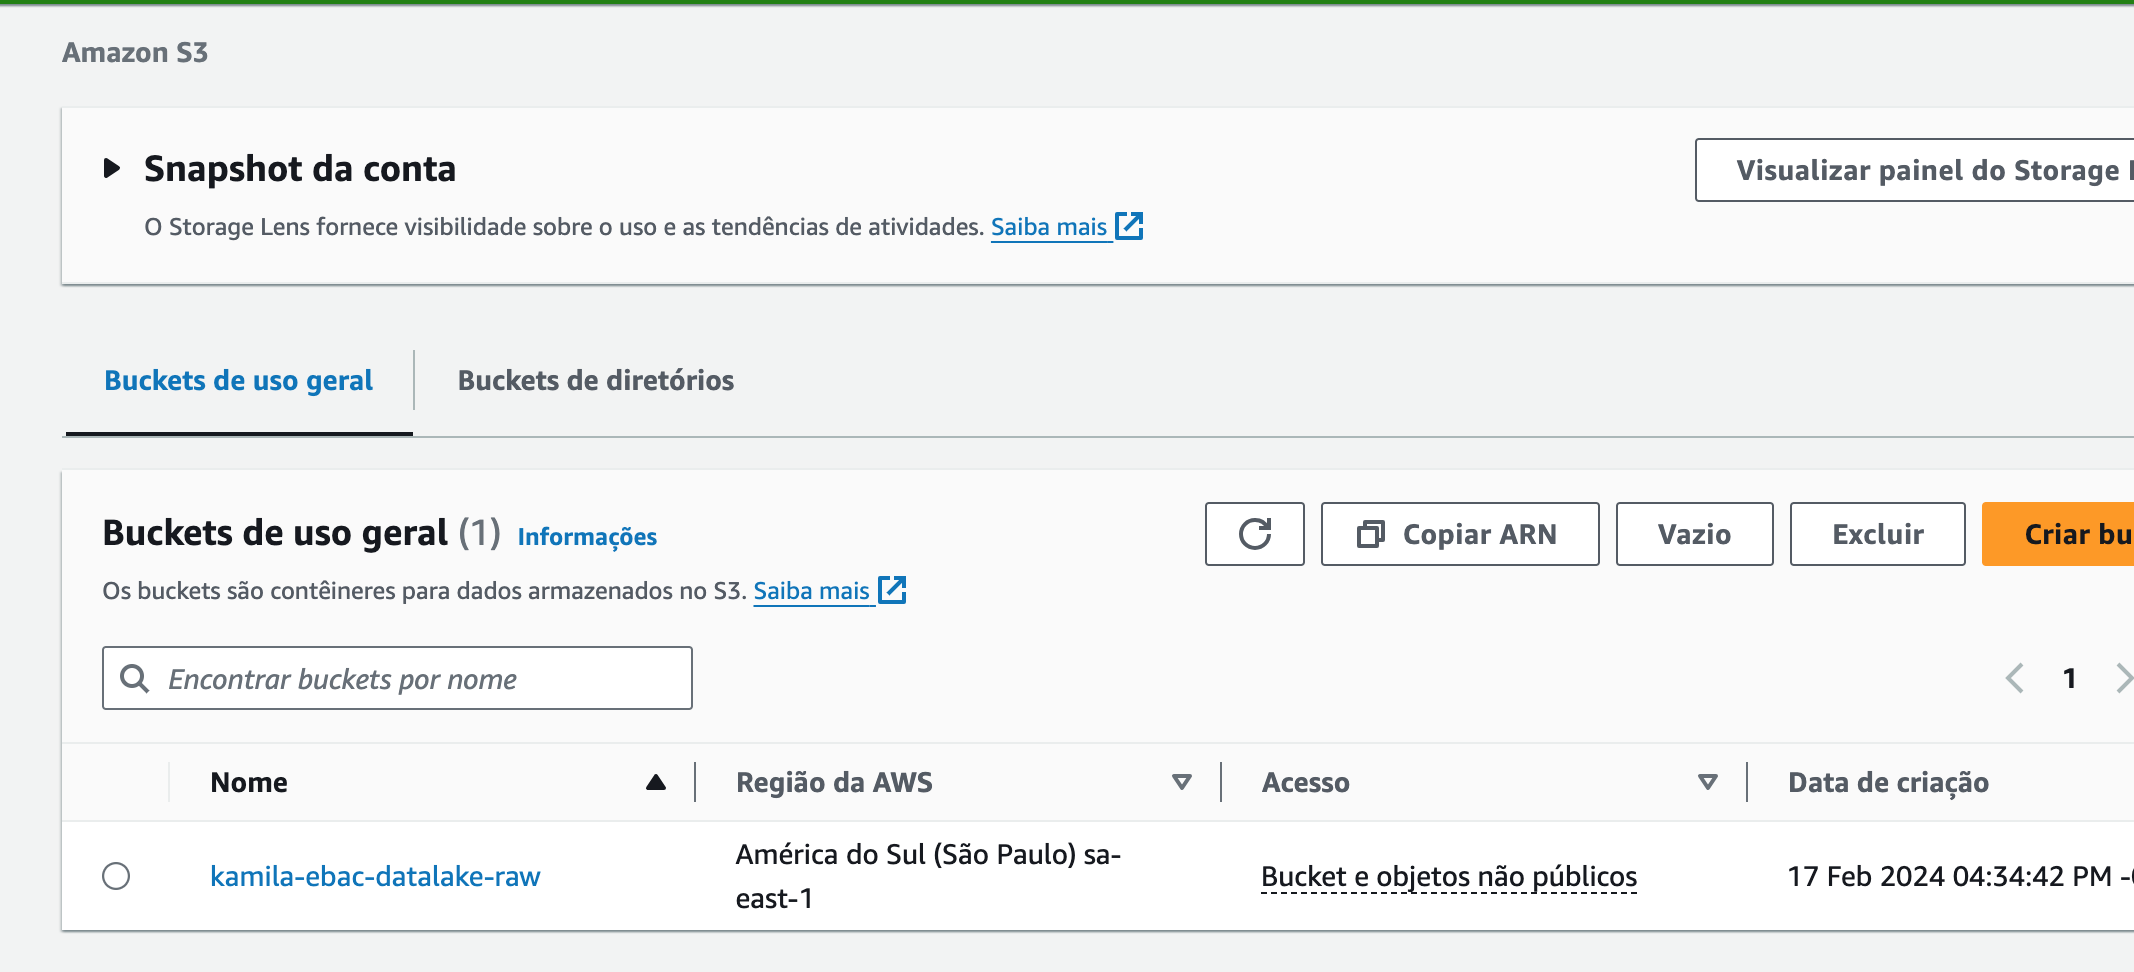

1.2. Função no AWS Lambda para recebimento das mensagens e armazenamento no formato JSON no bucket de dados crus com permissão de interação com AWS S3 no AWS IAM.
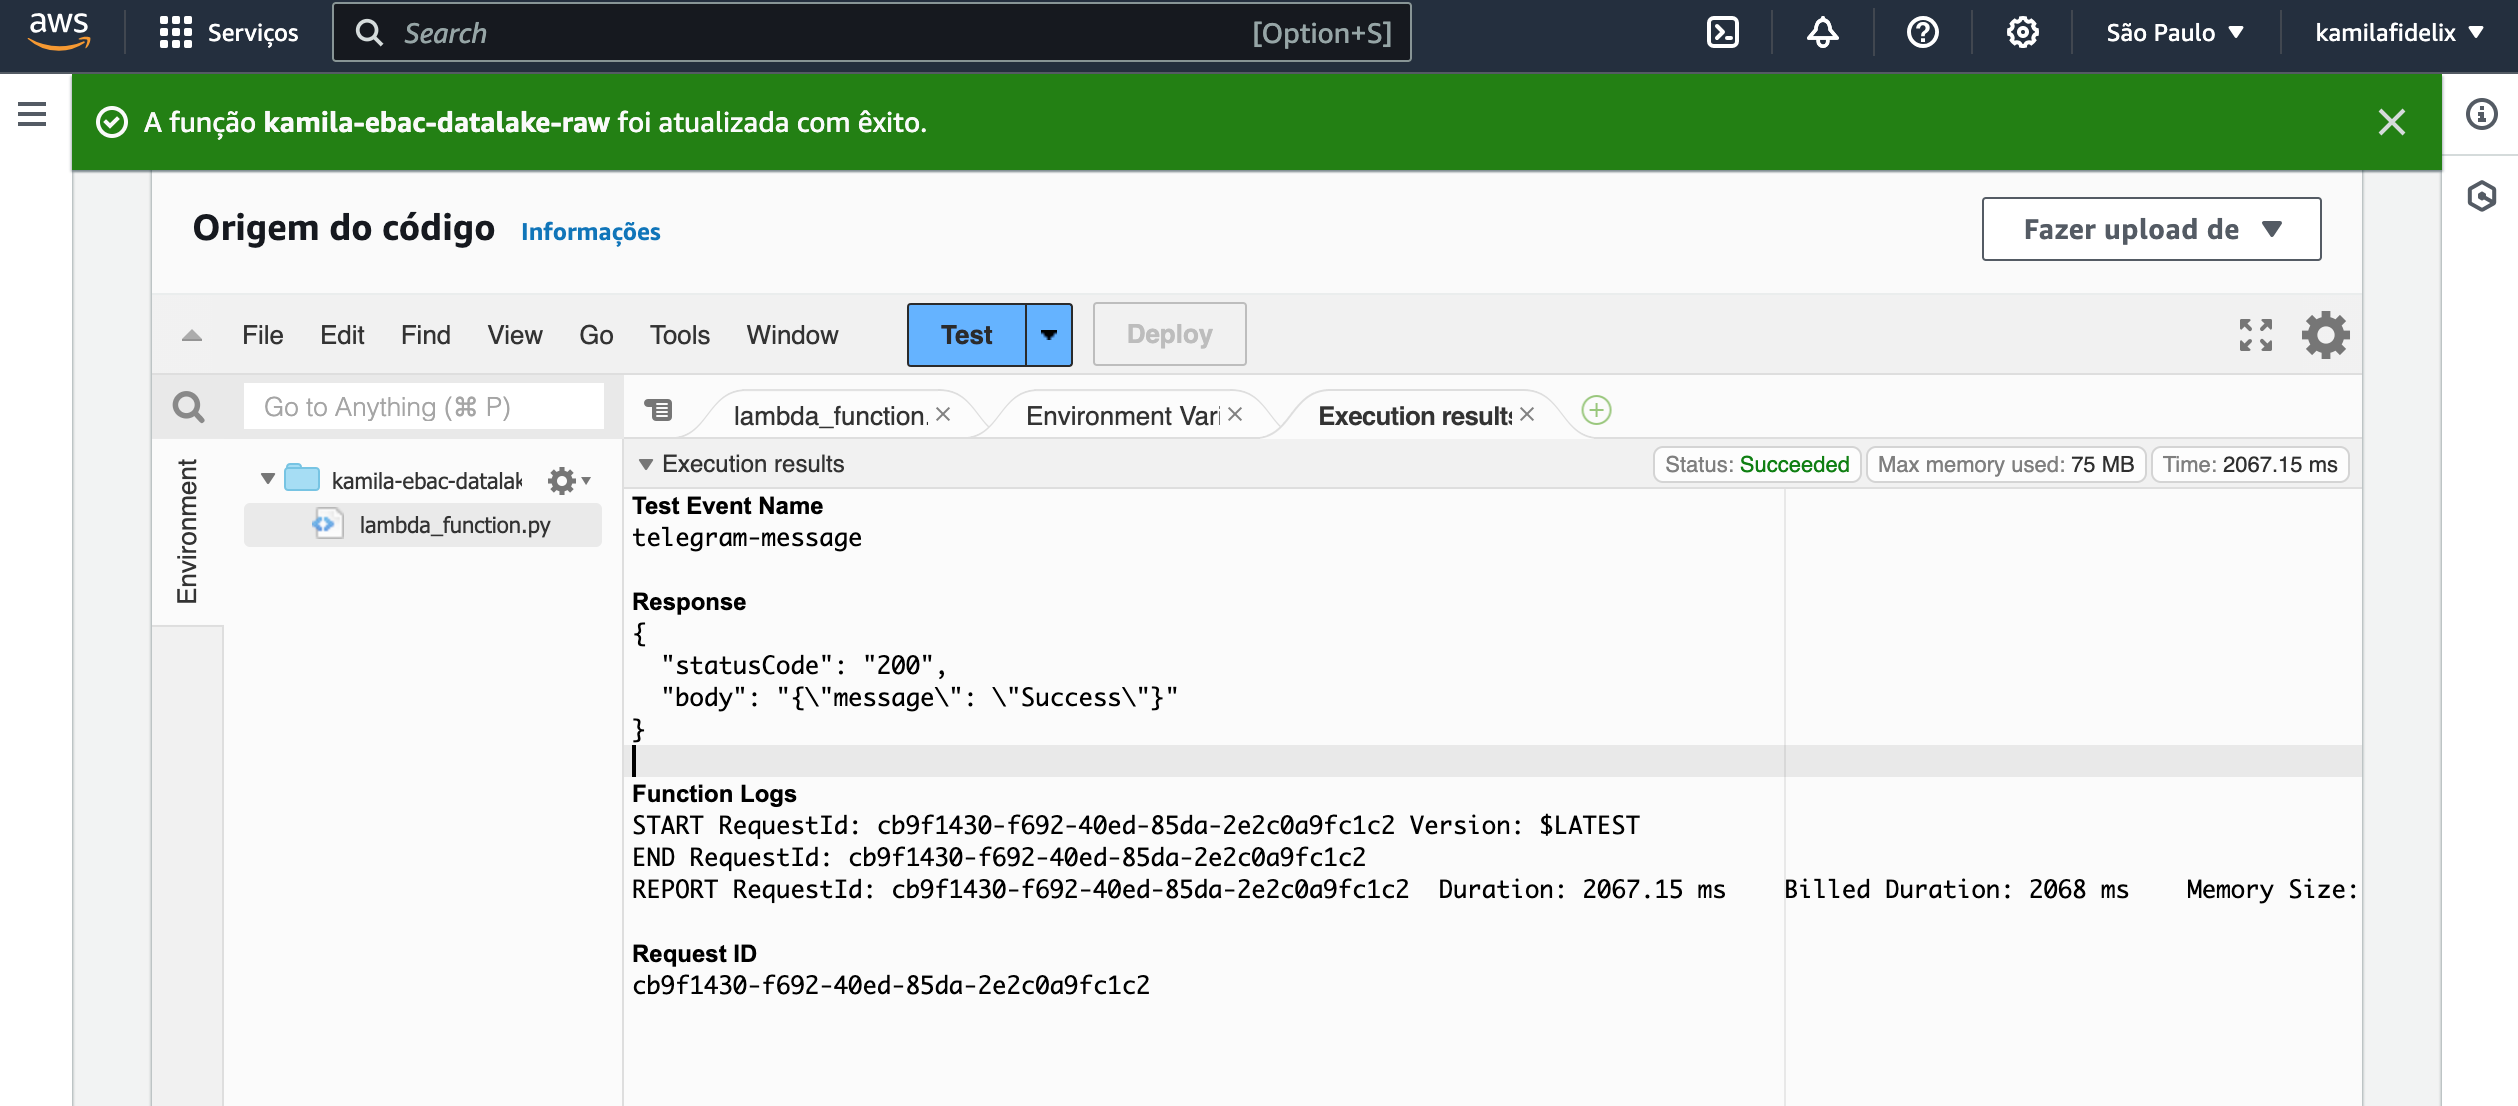

In [ ]:
#FunCao Lambda
import os
import json
import logging
from datetime import datetime, timezone

def lambda_handler(event: dict, context: dict) -> dict:

  '''
  Recebe uma mensagens do Telegram via AWS API Gateway, verifica no
  seu conteúdo se foi produzida em um determinado grupo e a escreve,
  em seu formato original JSON, em um bucket do AWS S3.
  '''

  # vars de ambiente

  BUCKET = os.environ['AWS_S3_BUCKET']
  TELEGRAM_CHAT_ID = int(os.environ['TELEGRAM_CHAT_ID'])

  # vars lógicas

  tzinfo = timezone(offset=timedelta(hours=-3))
  date = datetime.now(tzinfo).strftime('%Y-%m-%d')
  timestamp = datetime.now(tzinfo).strftime('%Y%m%d%H%M%S%f')

  filename = f'{timestamp}.json'

  # código principal

  client = boto3.client('s3')

  try:

    #message = json.loads(event["body"])
    message = event
    chat_id = message["message"]["chat"]["id"]

    if chat_id == TELEGRAM_CHAT_ID:

      with open(f"/tmp/{filename}", mode='w', encoding='utf8') as fp:
        json.dump(message, fp)

      client.upload_file(f'/tmp/{filename}', BUCKET, f'telegram/context_date={date}/{filename}')

  except Exception as exc:
      logging.error(msg=exc)
      return dict(statusCode="500")

  else:
      return dict(statusCode="200")

::1.3. API no AWS API Gateway a conectado à função do AWS Lambda

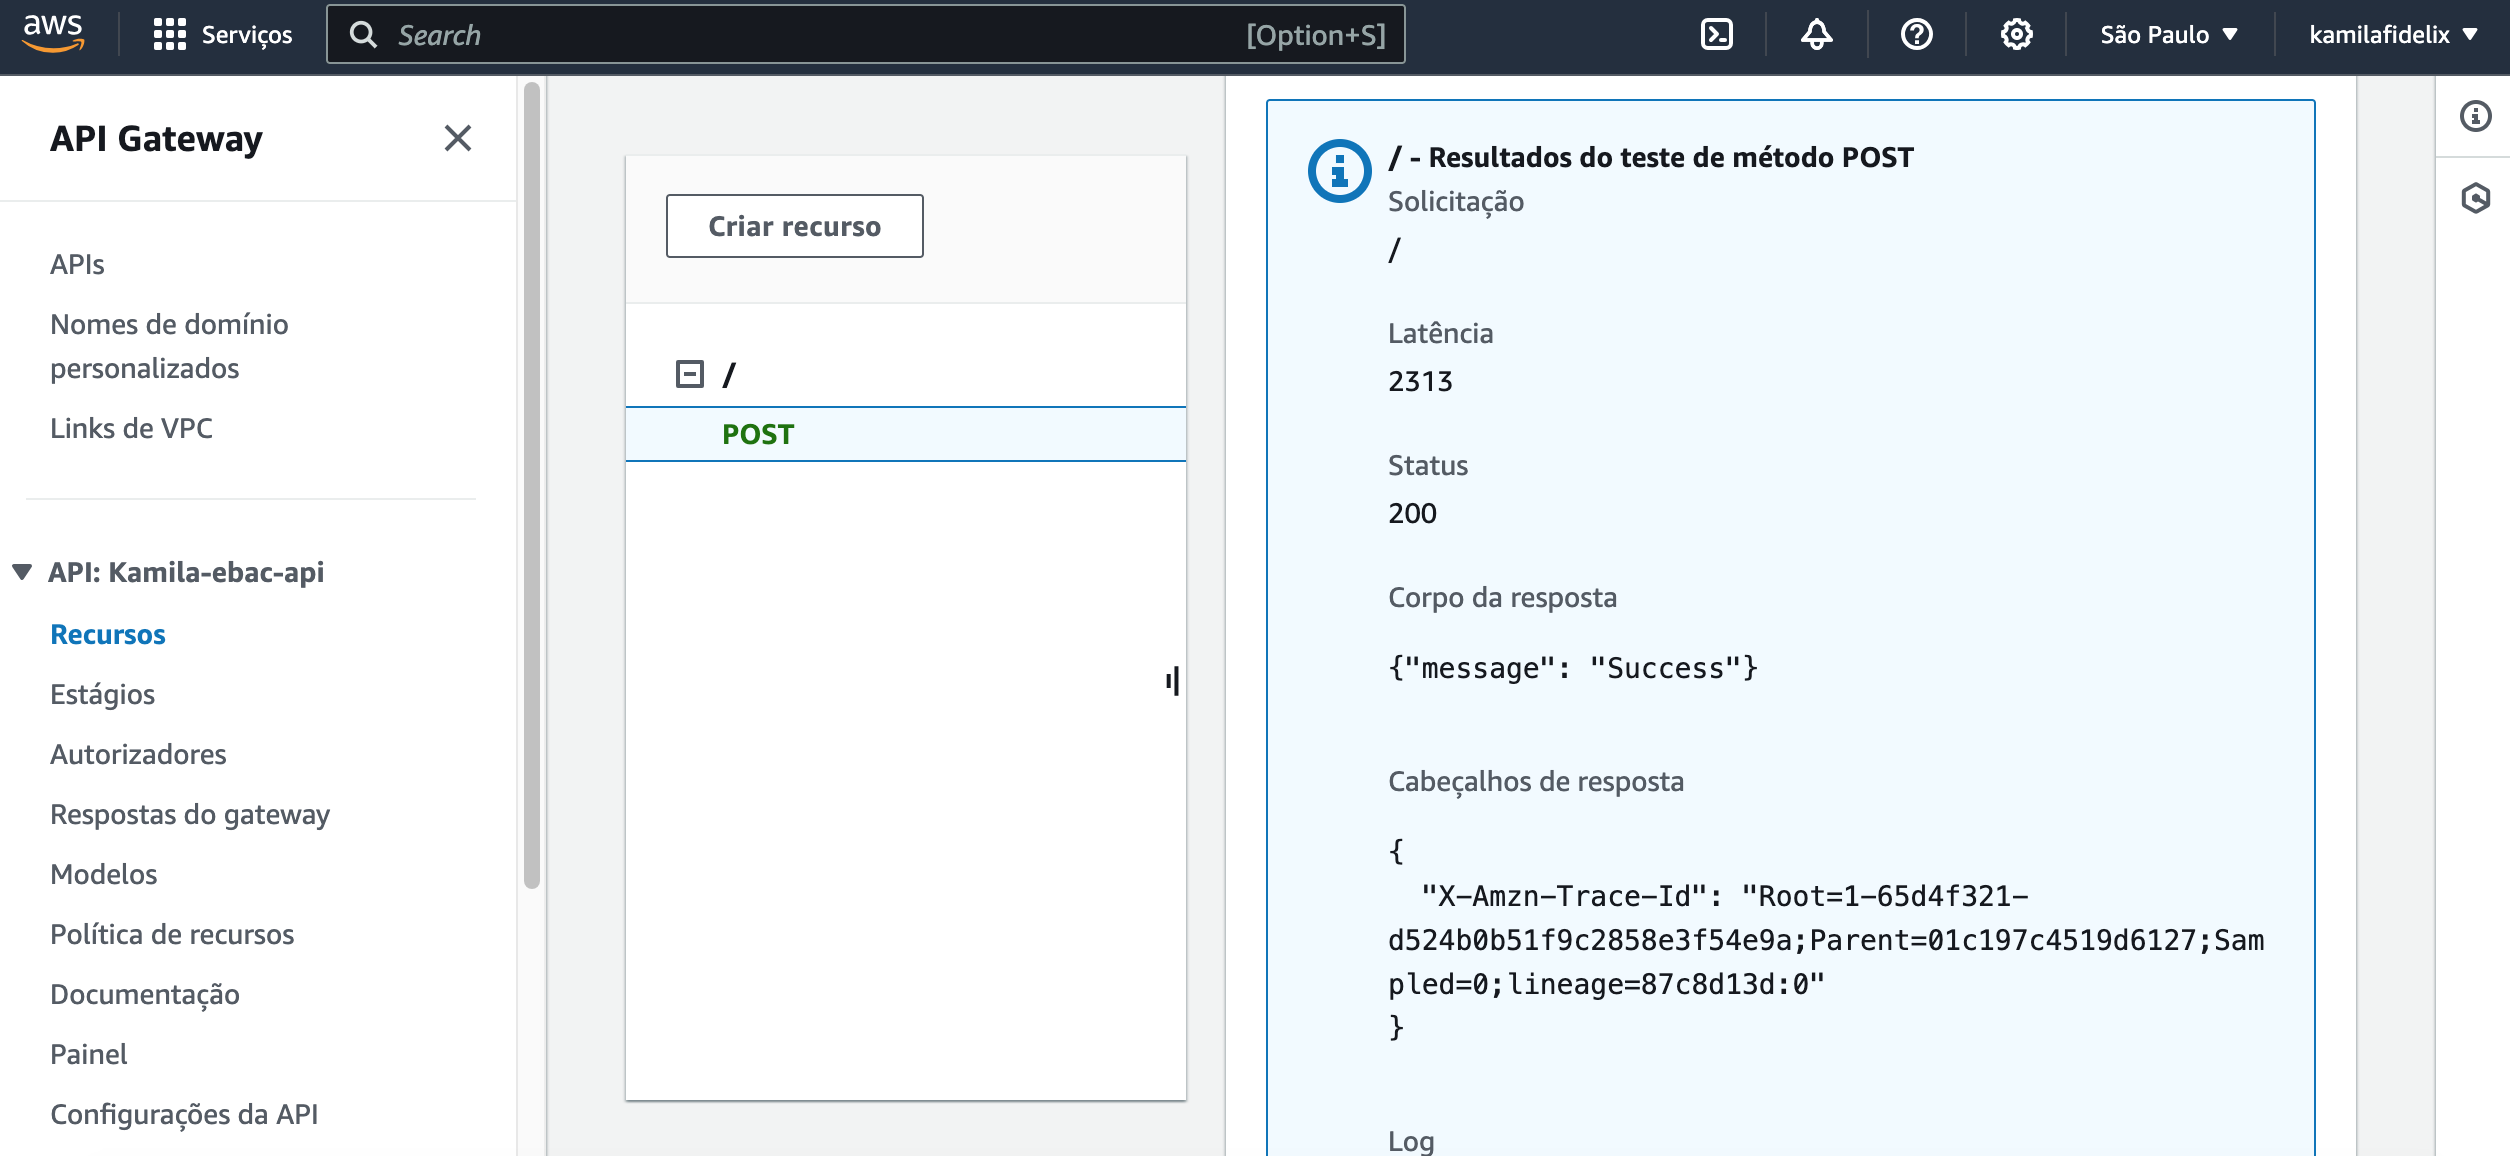

In [ ]:
import getpass

aws_api_gateway_url = getpass.getpass()

1.4. Configuração do webhook do bot através do método setWebhook da API de bots do Telegram

In [ ]:
from getpass import getpass

token = getpass()

In [ ]:
import requests
import json

base_url = f'https://api.telegram.org/bot{token}'

response = requests.get(url=f'{base_url}/setWebhook?url={aws_api_gateway_url}')

print(json.dumps(json.loads(response.text), indent=2))

In [ ]:
response = requests.get(url=f'{base_url}/getWebhookInfo')

print(json.dumps(json.loads(response.text), indent=2))

# 2\. ETL

O dado cru armazenado passa por um processo recorrente onde ele é limpo, duplicado e persistido com técnicas de particionamento, orientado a coluna e compressão. Ao final, o dado está pronto para ser analisado por profissionais da área.

- 2.1. bucket no AWS S3 para o armazenamento de dados enriquecidos.

- 2.2. função no AWS Lambda para processar as mensagens JSON de uma única partição do dia anterior (D-1) Configuração das variáveis de ambiente Adição das permissão de interação com AWS S3 no AWS IAM, de configurar o timeout e de layer com o código do pacote Python PyArrow.

In [ ]:
#funcao lambda
import os
import json
import logging
from datetime import datetime, timedelta, timezone


import pyarrow as pa
import pyarrow.parquet as pq


def lambda_handler(event: dict, context: dict) -> bool:

  '''
  Diariamente é executado para compactar as diversas mensagensm, no formato
  JSON, do dia anterior, armazenadas no bucket de dados cru, em um único
  arquivo no formato PARQUET, armazenando-o no bucket de dados enriquecidos
  '''

  # vars de ambiente

  RAW_BUCKET = os.environ['AWS_S3_BUCKET']
  ENRICHED_BUCKET = os.environ['AWS_S3_ENRICHED']

  # vars lógicas

  tzinfo = timezone(offset=timedelta(hours=-3))
  date = (datetime.now(tzinfo) - timedelta(days=1)).strftime('%Y-%m-%d')
  timestamp = datetime.now(tzinfo).strftime('%Y%m%d%H%M%S%f')

  # código principal

  table = None
  client = boto3.client('s3')

  try:

      response = client.list_objects_v2(Bucket=RAW_BUCKET, Prefix=f'telegram/context_date={date}')

      for content in response['Contents']:

        key = content['Key']
        client.download_file(RAW_BUCKET, key, f"/tmp/{key.split('/')[-1]}")

        with open(f"/tmp/{key.split('/')[-1]}", mode='r', encoding='utf8') as fp:

          data = json.load(fp)
          data = data["message"]

        parsed_data = parse_data(data=data)
        iter_table = pa.Table.from_pydict(mapping=parsed_data)

        if table:

          table = pa.concat_tables([table, iter_table])

        else:

          table = iter_table
          iter_table = None

      pq.write_table(table=table, where=f'/tmp/{timestamp}.parquet')
      client.upload_file(f"/tmp/{timestamp}.parquet", ENRICHED_BUCKET, f"telegram/context_date={date}/{timestamp}.parquet")

      return True

  except Exception as exc:
      logging.error(msg=exc)
      return False

In [ ]:
#funcao wraling
def parse_data(data: dict) -> dict:

  date = datetime.now().strftime('%Y-%m-%d')
  timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

  parsed_data = dict()

  for key, value in data.items():

      if key == 'from':
          for k, v in data[key].items():
              if k in ['id', 'is_bot', 'first_name']:
                parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

      elif key == 'chat':
          for k, v in data[key].items():
              if k in ['id', 'type']:
                parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

      elif key in ['message_id', 'date', 'text']:
          parsed_data[key] = [value]

  if not 'text' in parsed_data.keys():
    parsed_data['text'] = [None]

  return parsed_data

2.3. Criação de uma regra no AWS Event Bridge para executar a função do AWS Lambda todo dia a meia noite no horário de Brasília (GMT-3). Uma vez ao dia, o AWS Event Brigde aciona o AWS Lambda que, por sua vez, processa todas as mensagens geradas no dia anterior (D-1), desnormaliza o dado semi-estruturado típico de arquivos JSON, salva o conteúdo processado em um arquivo no formato Apache Parquet e o armazena no AWS S3 particionado por dia.

O código abaixo é executado diariamente pelo AWS Event Brigde - em horário pré-estabelecido - para compactar as diversas mensagens que chegam no grupo (do dia anterior), no formato JSON armazenadas no bucket de dados cru (raw), em um único arquivo no formato Parquet. Após o processamento, as mensagens são armazenadas no bucket de dados enriquecidos (enriched).

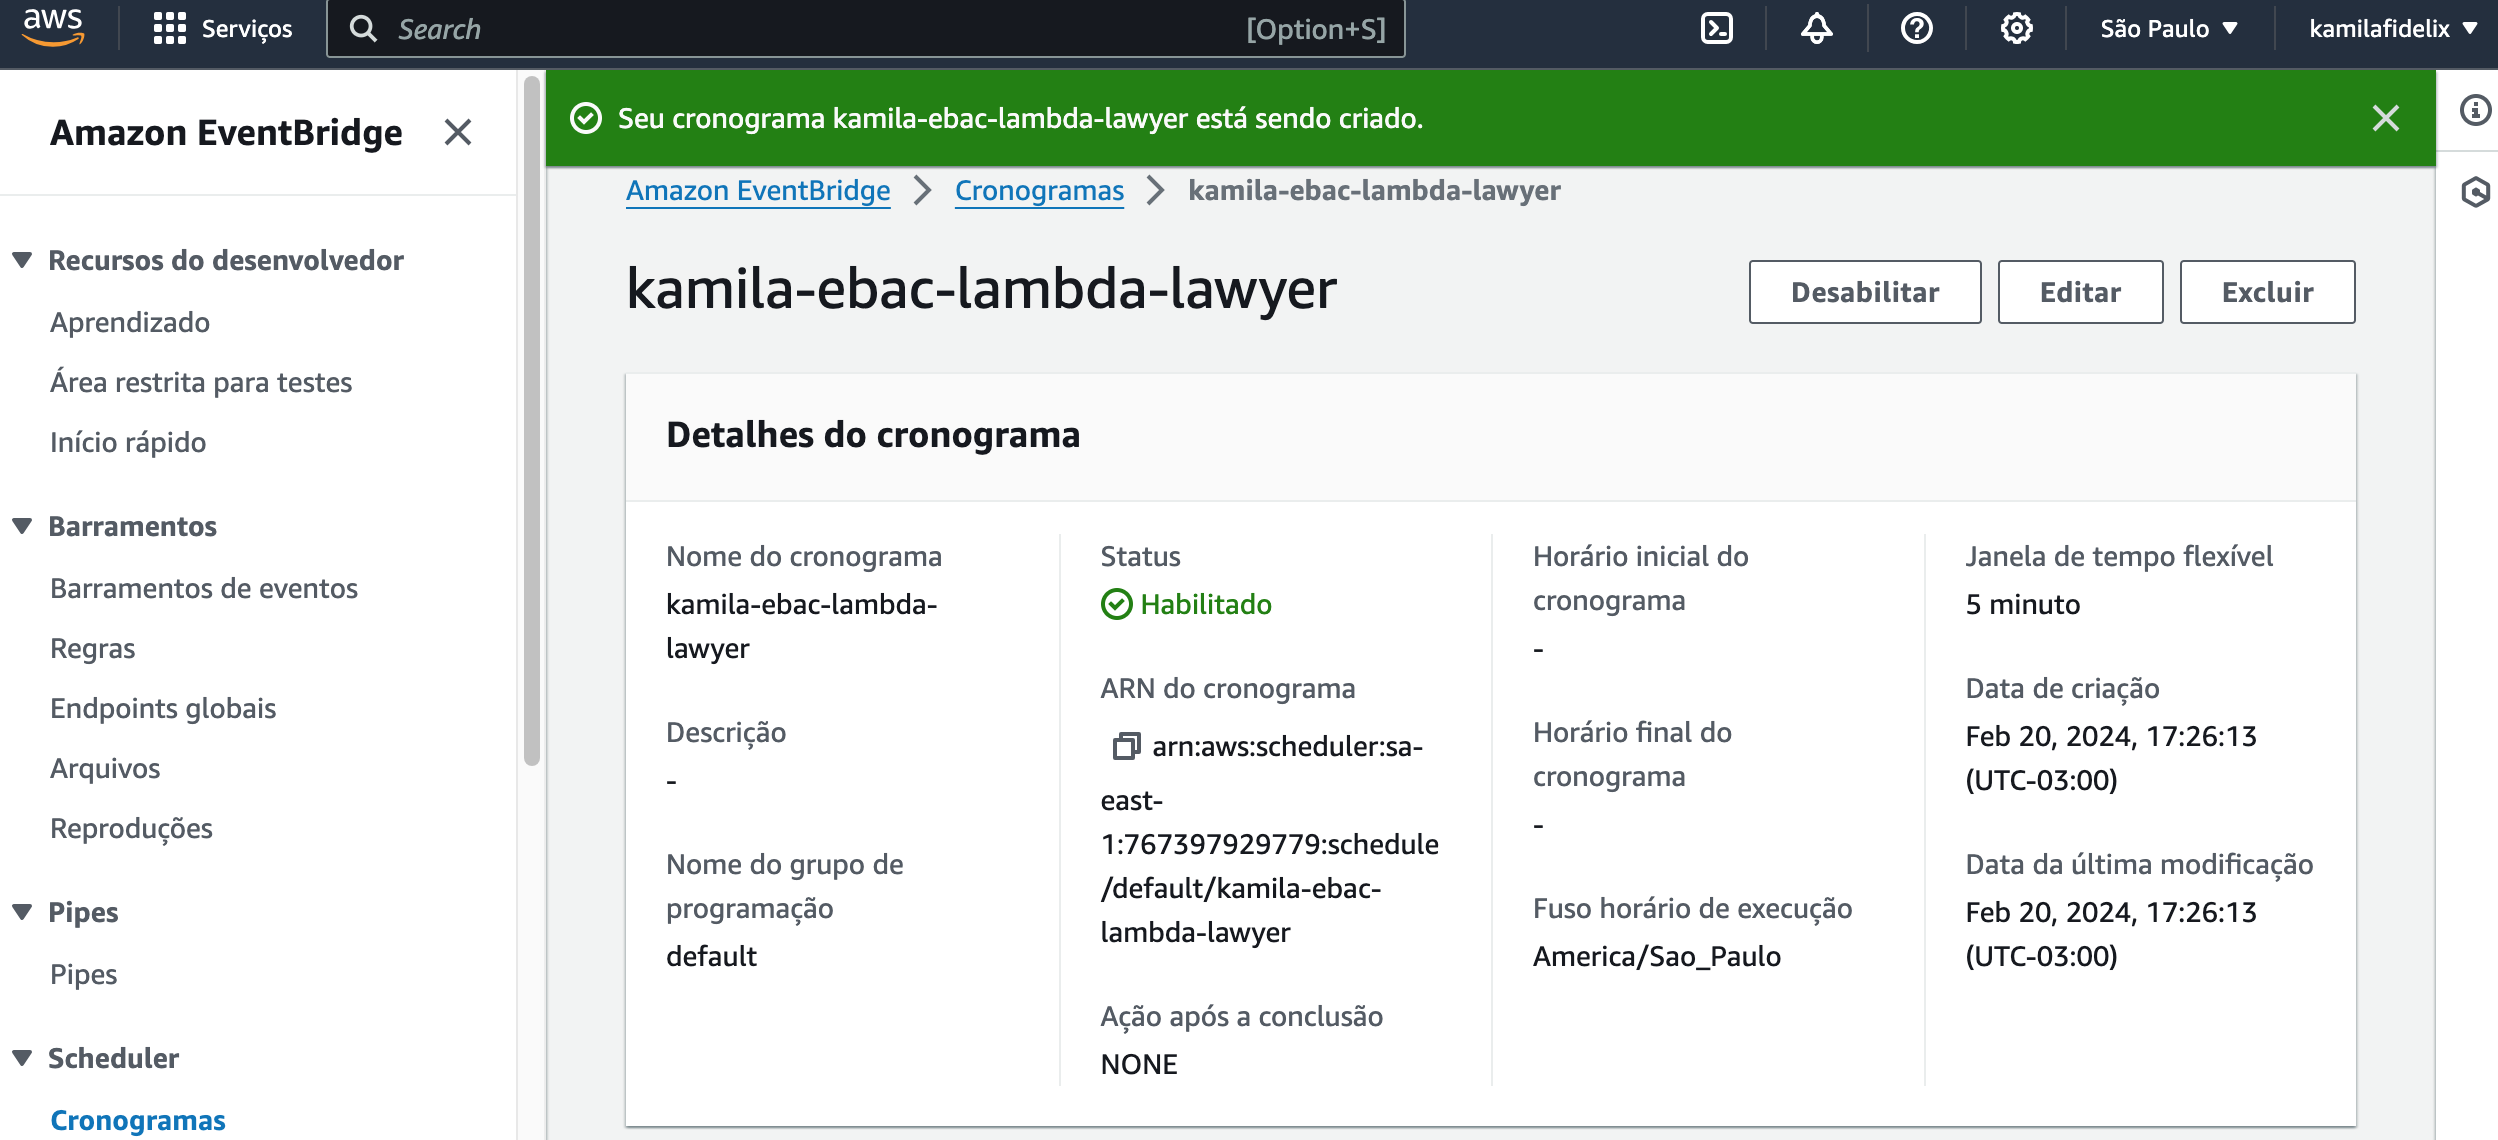

# 3\. Apresentação

Nesta etapa, o AWS Athena tem como função apresentar os dados aos usuários e sistemas, através de uma interface SQL. Portanto, é necessário a criação de uma tabela externa sobre o dado armazenado na camada mais refinada da arquitetura, a camada enriquecida (enriched) - entregando assim dados mais consistentes e com consultas mais baratas.

3.1. A tabela foi criada com a seguinte query

In [ ]:
CREATE EXTERNAL TABLE `telegram`(
  `message_id` bigint,
  `user_id` bigint,
  `user_is_bot` boolean,
  `user_first_name` string,
  `chat_id` bigint,
  `chat_type` string,
  `text` string,
  `date` bigint)
PARTITIONED BY (
  `context_date` date)
ROW FORMAT SERDE
  'org.apache.hadoop.hive.ql.io.parquet.serde.ParquetHiveSerDe'
STORED AS INPUTFORMAT
  'org.apache.hadoop.hive.ql.io.parquet.MapredParquetInputFormat'
OUTPUTFORMAT
  'org.apache.hadoop.hive.ql.io.parquet.MapredParquetOutputFormat'
LOCATION
  's3://<bucket-enriquecido>/'

In [ ]:
MSCK REPAIR TABLE `telegram`;

In [ ]:
SELECT * FROM `telegram` LIMIT 10;

# 4\.Analitycs

Com os dados armazenados, limpos e processados, podemos fazer algumas análises com as consultas SQL no AWS Athena e responder algumas questões pertinentes para contratantes dos serviços de chatbots.

In [ ]:
#Quantidade de mensagens por dia.
SELECT
  context_date,
  count(1) AS "message_amount"
FROM "telegram"
GROUP BY context_date
ORDER BY context_date DESC

Foi realizado testes durante 2 dias e obtive o seguinte resultado:

R: 5 msg por dia

In [ ]:
#Quantidade de mensagens por usuário por dia.
SELECT
  user_id,
  user_first_name,
  context_date,
  count(1) AS "message_amount"
FROM "telegram"
GROUP BY
  user_id,
  user_first_name,
  context_date
ORDER BY context_date DESC


```
user_id,user_first_name,context_date,,
8,5208002203,Ka,2024-02-20,4
9,5202449052,Julia,2024-02-20,1
8,5208002203,Ka,2024-02-21,4
9,5202449052,Julia,2024-02-21,1
```


In [ ]:
#Média do tamanho das mensagens por usuário por dia.
SELECT
  user_id,
  user_first_name,
  context_date,
  CAST(AVG(length(text)) AS INT) AS "average_message_length"
FROM "telegram"
GROUP BY
  user_id,
  user_first_name,
  context_date
ORDER BY context_date DESC

Obtive a seguinte resposta:


```
user_id,user_first_name,context_date,,
8,5607093956,Kamila,2024-02-20,3
9,5602449052,Julia,2024-02-20,9
8,5607093956,Kamila,2024-02-21,47
9,5607093956,Julia,2024-02-21,5
```


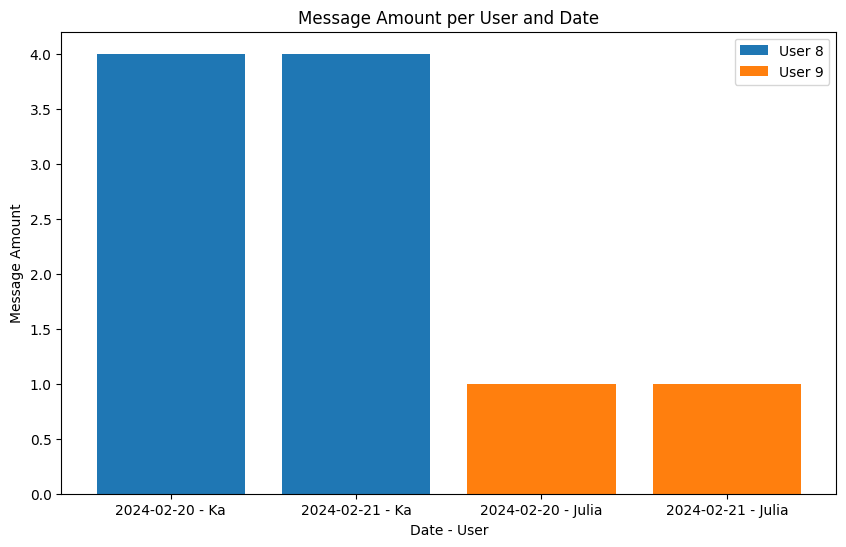

In [ ]:
#construindo um gráfico
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'user_id': [8, 9, 8, 9],
    'user_first_name': ['Ka', 'Julia', 'Ka', 'Julia'],
    'context_date': ['2024-02-20', '2024-02-20', '2024-02-21', '2024-02-21'],
    'message_amount': [4, 1, 4, 1]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Group data by user_id and context_date, summing the message_amount
grouped_df = df.groupby(['user_id', 'user_first_name', 'context_date']).sum().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))

for user_id, group_df in grouped_df.groupby('user_id'):
    plt.bar(group_df['context_date'] + f' - {group_df["user_first_name"].iloc[0]}', group_df['message_amount'], label=f'User {user_id}')

plt.xlabel('Date - User')
plt.ylabel('Message Amount')
plt.title('Message Amount per User and Date')
plt.legend()
plt.show()
